### **Project 2 : Predict heart disease using medical information**

In [0]:
# Import modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import seaborn as sns # plots
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

---
> ##### **1. Checking and understanding the data**
---

* Load data
* Checking missing values
* Checking data structure

---


In [2]:
# Load the data

data = pd.read_csv("https://raw.githubusercontent.com/mp-rocha/data-projects/master/heart-disease-predict/heart-disease-predict/heart.csv")
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Checking for missing data

print(data.isnull().sum())
print('\nNo missing data')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing data


---
> ##### **2. Exploratory data analysis**
---

* Describe data
* Number of people with heart disease
* Proportion men x women in dataset
* Who has more heart disease men or women?
* People without heart disease can raise heart rate?
* People with> 120mg blood sugar higher chances of heart disease?
* Are people with high cholesterol prone to heart disease?
* Which type of chest pain is more frequently when the people is sick?

---

In [5]:
# Statistical resume

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'Number of peoples')

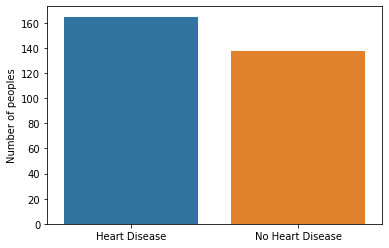

In [6]:
# Number of people with heart disease

n_target = data["target"].value_counts()

fig, ax = plt.subplots()
sns.barplot(x=["Heart Disease", "No Heart Disease"], y=n_target)
plt.ylabel("Number of peoples")


Text(0.5, 1.0, 'Proportion Male x Female')

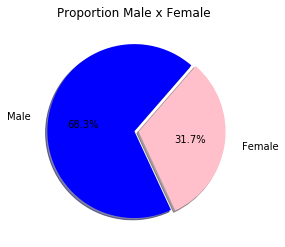

In [7]:
# Proportion of males and females

n_sex = data["sex"].value_counts()
sizes = list(n_sex.values)
fig, ax = plt.subplots()
ax.pie(n_sex, labels= ["Male", "Female"], colors=["blue", "pink"], shadow=True, labeldistance=1.2, autopct='%1.1f%%', explode=(0, 0.05), startangle=49)
plt.title("Proportion Male x Female")

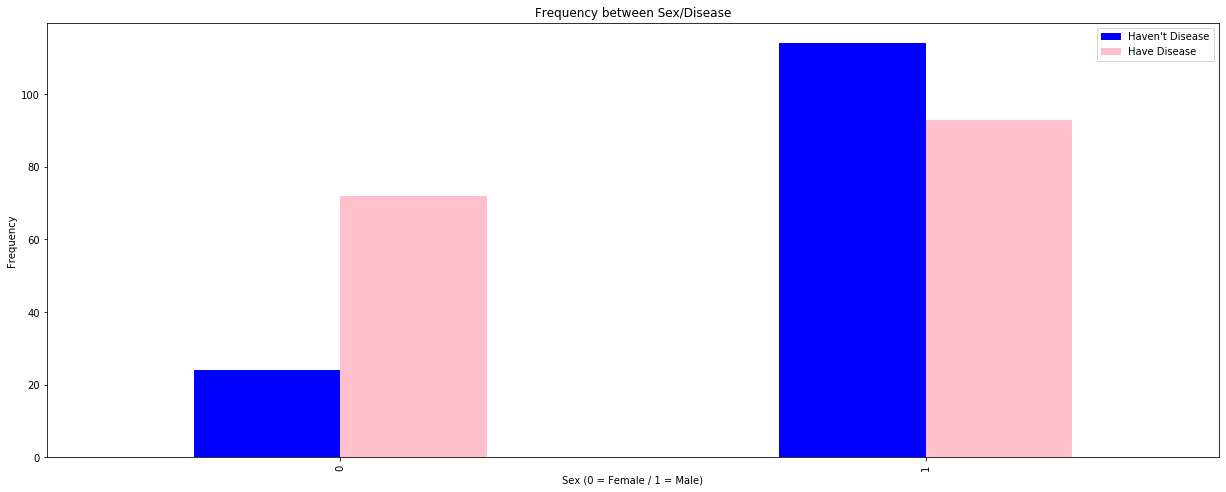

In [8]:
# Who has more heart disease men or women?

pd.crosstab(data.sex, data.target).plot(kind="bar", figsize = (21,8), colors=["blue", "pink"])
plt.title('Frequency between Sex/Disease')
plt.xlabel('Sex (0 = Female / 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [0]:
# People without heart disease can raise heart rate?

heartraise = data.loc[(data["target"] == 0) & (data["exang"] == 1)]
print("Number of peoples with angina without heart disease: ", len(heartraise.index))

Number of peoples with angina without heart disease:  76


Text(0, 0.5, 'Number of peoples')

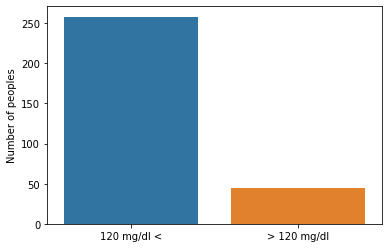

In [9]:
# Number of peoples with sugar blood > 120mg/dl

sns.barplot(x=["120 mg/dl <", "> 120 mg/dl"], y=data["fbs"].value_counts())
plt.ylabel("Number of peoples")

Text(0, 0.5, 'Number of peoples with diabetes')

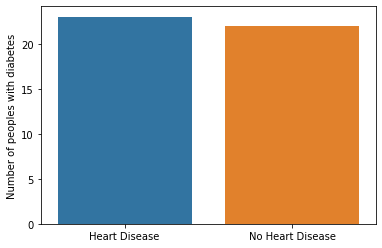

In [10]:
# Are people with diabetes more likely to have heart disease?

diabetes = data.loc[data["fbs"] == 1]
sns.barplot(x=["Heart Disease", "No Heart Disease"], y=diabetes["target"].value_counts())
plt.ylabel("Number of peoples with diabetes")

In [11]:
# Which type of chest pain is more frequently when the people is sick?

sick = data.loc[(data["target"] == 1)]
sick["cp"].value_counts()

# The type 2 of chest pain is more frequently when people has heart disease.

2    69
1    41
0    39
3    16
Name: cp, dtype: int64

---
> ##### **3. Feature engeneering**
---

* Transform numerical variable to category variable
* Transform matrix to sparse

---

In [0]:
# Converting Age in class

# 0 - (25-40)
# 1 - (41-50)
# 2 - (51-60)
# 3 - (61-80)

# Defining intervals
age_bins = [0, 40, 50, 60, 120]
age_bins_label = [0, 1, 2, 3]

# Converting numerical variabel "Age" in a categorical variable
df["age"] = pd.cut(df['age'], age_bins, labels=age_bins_label, include_lowest=True)

# Converting "trestbps" in class

# 0 - (90-120)
# 1 - (121-150)
# 2 - (151-200)

# Defining intervals
trestbps_bins = [90, 120, 150, 200]
trestbps_label = [0, 1, 2]

# Converting numerical variable "trestbps" in categorical variable
df['trestbps'] = pd.cut(df['trestbps'], trestbps_bins, labels=trestbps_label, include_lowest=True)

# Converting "chol" in class

# 0 - (0-250)
# 1 - (250-600)

# Defing intervals
chol_bins = [0, 250, 600]
chol_label = [0, 1]

# Converting 'chol' in category variable
df['chol'] = pd.cut(df['chol'], chol_bins, labels=chol_label, include_lowest=True)

# Converting "thalach" in class

# 0 - (80-130)
# 1 - (131-160)
# 2 - (161-210)

# Defing intervals
thalach_bins = [80, 130, 160, 210]
thalach_label = [0, 1, 2]

# Converting 'thalach' in category variable
df['thalach'] = pd.cut(df['thalach'], thalach_bins, labels=thalach_label, include_lowest=True)

# Converting "oldpeak" in class

# 0 - (0-1)
# 1 - (1-2)
# 2 - (2-6)

# Defing intervals
oldpeak_bins = [0, 1, 2, 6]
oldpeak_label = [0, 1, 2]

# Converting 'chol' in category variable
df['oldpeak'] = pd.cut(df['oldpeak'], oldpeak_bins, labels=oldpeak_label, include_lowest=True)

In [13]:
# Using get_dummies to transform in a sparse matrix

df_dummies = pd.get_dummies(df, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"])
df_dummies.head(2)

,target,age_0,age_1,age_2,age_3,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,trestbps_0,trestbps_1,trestbps_2,chol_0,chol_1,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,thalach_0,thalach_1,thalach_2,exang_0,exang_1,oldpeak_0,oldpeak_1,oldpeak_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0


---
> ##### **4. Construct a baseline and simple models**
---

* Define train e test data
* Make dummies
* Define a baseline
* Define metric
* Run Random forest classifier model

---

In [32]:
from sklearn.model_selection import train_test_split

# Defining variables and split data [DATA WITHOUT FEATURE ENGENEERING]

y = data["target"]
X = data.drop(labels=["target"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Data dimension
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Defining variables and split data [DUMMY DATA]

y_dummies = df_dummies["target"]
X_dummies = df_dummies.drop(labels=["target"], axis = 1)

X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, test_size = 0.2, random_state = 42)

# Data dimension
print(X_train_dummies.shape, X_test_dummies.shape, y_train_dummies.shape, y_test_dummies.shape)

(242, 13) (61, 13) (242,) (61,)
(242, 40) (61, 40) (242,) (61,)


In [36]:

# Creating a first simple models to predict heart disease. [WITHOUT FEATURE ENGENEERING]

def model(X_train, y_train, X_test, y_test):
    
    # Importing models
    from sklearn.linear_model import RidgeClassifier, SGDClassifier
    from sklearn.svm import LinearSVC, SVC
    from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score


    models = [RidgeClassifier(), SGDClassifier(), LinearSVC(), SVC(), DecisionTreeClassifier(), ExtraTreeClassifier(),                                      AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(), XGBClassifier()]

    models_name = ["RidgeClassifier", "SGDClassifier", "LinearSVC", "SVC", "DecisionTreeClassifier", "ExtraTreeClassifier",                                      "AdaBoostClassifier", "BaggingClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "XGBClassifier"]
    

    # Looop for training all models
    valor = []

    for i in models:
        model = i
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        valor.append(acc)
        results = pd.DataFrame(list(zip(models_name, valor)), columns=["Model", "Accuracy"])
    
    return results.sort_values(by=['Accuracy'], ascending=False)

model(X_train, y_train, X_test, y_test)

,Model,Accuracy
0,RidgeClassifier,0.868852
9,RandomForestClassifier,0.852459
10,XGBClassifier,0.852459
4,DecisionTreeClassifier,0.836066
5,ExtraTreeClassifier,0.803279
6,AdaBoostClassifier,0.803279
1,SGDClassifier,0.786885
7,BaggingClassifier,0.786885
8,GradientBoostingClassifier,0.770492
2,LinearSVC,0.704918


In [33]:
# Creating a firsts simple models to predict heart disease. [DUMMY VARIABLE + FEATURE ENGENEERING]

def model(X_train, y_train, X_test, y_test):
    
    # Importing models
    from sklearn.linear_model import RidgeClassifier, SGDClassifier
    from sklearn.svm import LinearSVC, SVC
    from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score


    models = [RidgeClassifier(), SGDClassifier(), LinearSVC(), SVC(), DecisionTreeClassifier(), ExtraTreeClassifier(),                                      AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(), XGBClassifier()]

    models_name = ["RidgeClassifier", "SGDClassifier", "LinearSVC", "SVC", "DecisionTreeClassifier", "ExtraTreeClassifier",                                      "AdaBoostClassifier", "BaggingClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "XGBClassifier"]
    

    # Looop for training all models
    valor = []

    for i in models:
        model = i
        model.fit(X_train_dummies, y_train_dummies)
        y_pred = model.predict(X_test_dummies)
        acc = accuracy_score(y_test_dummies, y_pred)
        valor.append(acc)
        results = pd.DataFrame(list(zip(models_name, valor)), columns=["Model", "Accuracy"])
    
    return results.sort_values(by=['Accuracy'], ascending=False)

model(X_train_dummies, y_train_dummies, X_test_dummies, y_test_dummies)

,Model,Accuracy
0,RidgeClassifier,0.901639
3,SVC,0.901639
10,XGBClassifier,0.885246
2,LinearSVC,0.868852
8,GradientBoostingClassifier,0.852459
9,RandomForestClassifier,0.852459
1,SGDClassifier,0.819672
7,BaggingClassifier,0.819672
5,ExtraTreeClassifier,0.786885
6,AdaBoostClassifier,0.786885


Top 3 Models: RidgeClassifier, SVC and XGBClassifier

In [70]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge.fit(X_train_dummies, y_train_dummies)
y_pred = ridge.predict(X_test_dummies)
acc_ridge = accuracy_score(y_test_dummies, y_pred)

print('Ridge Classifier accuracy: ', acc_ridge)

# SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_dummies, y_train_dummies)
y_pred = svc.predict(X_test_dummies)
acc_svc = accuracy_score(y_test_dummies, y_pred)

print('SVClassifier accuracy: ', acc_svc)

#XGBoost classifier
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(X_train_dummies, y_train_dummies)
y_pred = xgboost.predict(X_test_dummies)
acc_xgboost = accuracy_score(y_test_dummies, y_pred)

print('xgboost Classifier accuracy: ', acc_xgboost)

Ridge Classifier accuracy:  0.9016393442622951
SVClassifier accuracy:  0.9016393442622951
xgboost Classifier accuracy:  0.8852459016393442


In [80]:
# import Neural Network libraries

import keras
from keras.models import Sequential
from keras.layers import Dense

# Create an archteture layer

# Create a sequential model
model = Sequential()

# Create an input layer
model.add(Dense(16, input_shape=(40,)))

# Create a hidden layer
model.add(Dense(16, activation='relu'))

# Create a hidden layer
model.add(Dense(8, activation='relu'))

# Create a output layer
model.add(Dense(1, activation='sigmoid'))

# Compile my model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of model
model.summary()

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                656       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [81]:
# fit the model

# Train my model for 25 epochs
history = model.fit(X_train_dummies, y_train_dummies, epochs=25, validation_data=(X_test_dummies, y_test_dummies))




Train on 242 samples, validate on 61 samples
Epoch 1/25





242/242 [==============================] - 1s 3ms/step - loss: 0.7481 - acc: 0.4545 - val_loss: 0.7140 - val_acc: 0.5410
Epoch 2/25
242/242 [==============================] - 0s 102us/step - loss: 0.6899 - acc: 0.4752 - val_loss: 0.6715 - val_acc: 0.5410
Epoch 3/25
242/242 [==============================] - 0s 77us/step - loss: 0.6537 - acc: 0.5620 - val_loss: 0.6430 - val_acc: 0.5902
Epoch 4/25
242/242 [==============================] - 0s 71us/step - loss: 0.6262 - acc: 0.6033 - val_loss: 0.6183 - val_acc: 0.6393
Epoch 5/25
242/242 [==============================] - 0s 76us/step - loss: 0.6028 - acc: 0.7066 - val_loss: 0.5936 - val_acc: 0.7213
Epoch 6/25
242/242 [==============================] - 0s 65us/step - loss: 0.5790 - acc: 0.7686 - val_loss: 0.5717 - val_acc: 0.7541
Epoch 7/25
242/242 [==============================] - 0s 68us/step - loss: 0.5584 - acc: 0.7975 - val_loss: 0.5475 - val_acc: 0.8033
Epoch 8/25
242/2

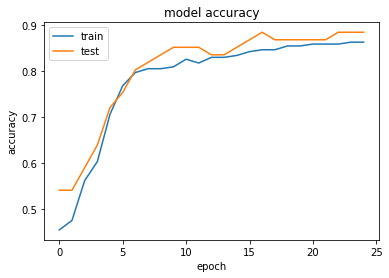

In [82]:
# Plot train vs test accuracy per epoch

plt.figure()

# Using the history metrics
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()